<a href="https://colab.research.google.com/github/koushikac/Data_science-Assignments/blob/main/Ground_project_Chirps_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
ground_cricket_data = {"Chirps_persecond": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps_persecond,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.columns


Index(['Chirps_persecond', 'Ground_Temperature'], dtype='object')

**Chirps/Second**

In [ ]:
df.Chirps_persecond.values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [ ]:
df.Chirps_persecond.unique()

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 17. , 14.4])

In [ ]:
df.Chirps_persecond.isnull().sum()

0

In [ ]:
df.Chirps_persecond.describe()

count    15.000000
mean     16.566667
std       1.712837
min      14.400000
25%      15.450000
50%      16.000000
75%      17.150000
max      20.000000
Name: Chirps_persecond, dtype: float64

**Ground_Temprature**

In [ ]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [ ]:
df.Ground_Temperature.unique()

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 69.4, 83.3, 79.6, 82.6,
       83.5, 76.3])

In [ ]:
df.Ground_Temperature.describe()

count    15.000000
mean     79.346667
std       7.020467
min      69.400000
25%      73.400000
50%      80.600000
75%      83.400000
max      93.300000
Name: Ground_Temperature, dtype: float64

In [ ]:
df.Ground_Temperature.isnull().sum()

0

In [ ]:
df.drop_duplicates()

,Chirps_persecond,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.Chirps_persecond.shape, df.Ground_Temperature.shape

((15,), (15,))

In [ ]:
df.Chirps_persecond.quantile(0.25)

15.45

In [ ]:
iqr = df.Chirps_persecond.quantile(0.75) - df.Chirps_persecond.quantile(0.25)
upper_threshold = df.Chirps_persecond.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps_persecond.quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

12.9
19.699999999999996


In [ ]:
df.dtypes

Chirps_persecond      float64
Ground_Temperature    float64
dtype: object

**EDA**

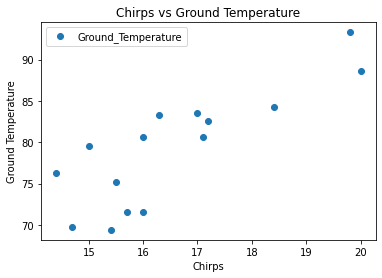

,Chirps_persecond,Ground_Temperature
Chirps_persecond,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
import numpy as np
df.plot(x='Chirps_persecond', y='Ground_Temperature', style='o')
plt.title('Chirps vs Ground Temperature')
plt.xlabel('Chirps')
plt.ylabel('Ground Temperature')
plt.show()
df[['Chirps_persecond','Ground_Temperature']].corr()

In [ ]:
X = df.loc[:, ["Chirps_persecond"]].values
y = df.loc[:, 'Ground_Temperature'].values

**Training Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Model selection**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)
print(y_pred)

[84.57846794 77.06677448 88.96028912]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,84.3,84.578468
1,80.6,77.066774
2,93.3,88.960289


**Metrics**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6320690972536755
